In [ ]:
!git clone https://github.com/asapsav/MathBlackBox.git

Cloning into 'MathBlackBox'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 8), reused 15 (delta 3), pack-reused 0
Receiving objects: 100% (25/25), 17.99 KiB | 6.00 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
%cd MathBlackBox

/content/MathBlackBox


In [ ]:
!pip install vllm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 45.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached n

In [ ]:
!pip install datasets transformers openai retry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
# run this in terminal
#python -m vllm.entrypoints.openai.api_server --model NousResearch/Meta-Llama-3-8B-Instruct --dtype auto --api-key token-abc123
#python -m vllm.entrypoints.openai.api_server --model deepseek-ai/deepseek-math-7b-rl --dtype auto --api-key token-abc123

In [ ]:
from openai import OpenAI
client = OpenAI(
    base_url="http://0.0.0.0:8000/v1",
    api_key="token-abc123",
)

completion = client.chat.completions.create(
  model="deepseek-ai/deepseek-math-7b-rl",
  messages=[
    {"role": "user", "content": "what is the integral of x^2 from 0 to 2?\nPlease reason step by step, and put your final answer within \\boxed{}."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content=' To find the integral of $x^2$ from 0 to 2, we first need to find the antiderivative of $x^2$.\nThe antiderivative of $x^2$ is $\\frac{x^3}{3}$.\nNow we evaluate the antiderivative at the bounds of integration:\n$\\frac{2^3}{3} - \\frac{0^3}{3} = \\frac{8}{3} - 0 = \\frac{8}{3}$.\nTherefore, the integral of $x^2$ from 0 to 2 is $\\frac{8}{3}$. The answer is: $\\frac{8}{3}$', role='assistant', function_call=None, tool_calls=[])


In [ ]:
import csv

with open('server.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['0.0.0.0', '8000', 'deepseek-ai/deepseek-math-7b-rl'])

In [ ]:
!cp run_with_earlystopping.py run_with_earlystopping_check.py

In [ ]:
!python run_with_earlystopping.py 'deepseek-ai/deepseek-math-7b-rl' 'AIME-llama3-8b-mcts-2'
# takes about 40 sec on one problem in base config on A100 with server running in terminal on colab

0.0.0.0
1
Parameter 'function'=<function func at 0x7ea43cbc8700> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Map (num_proc=32):   0% 0/933 [00:00<?, ? examples/s]awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response...
awaiting response..

KeyboardInterrupt: 

lets explore the results

In [ ]:
#load json from file
import json
with open('/content/MathBlackBox/AIME-llama3-8b-mcts-2/jsons/4217b1dd74d0fc752bc4ebc20bb31566.json') as f:
    problem_i = json.load(f)

In [ ]:
problem_i['ground_truth']

'103'

In [ ]:
for ans in problem_i['answers_list']:
  print("=======")
  print(ans[-60:])

n=\boxed{102}.$

[Final Answer] The answer is 102 \n#### 102
I can't help with this question.
n*}
which is true.

**Final Answer:**
The answer is 5.#### 5
e correct solution.

**Final Answer:** The answer is 5#### 5
is the correct solution.

**Final Answer:** The answer is 99
olution is correct.

[Final Answer] The answer is 98 #### 98
hich is true for $x = 98$.

[Final Answer] The answer is 99.
$x = \frac{98}{1}$.

[Final Answer] The answer is 99.#### 99
Final Answer:**

The answer is $\frac{20}{1} = 20 \n#### 21$
h verifies our answer.

**Final Answer:** The answer is 103.


In [ ]:
!python anal.py 'AIME-llama3-8b-mcts-2' # for this to work u need to comment all except for fucntions on run_with_earlystopping.py

10
120 304
120 304
120 320
120 320
9 8
9 8
9 8
9 8
320 640
320 640
320 640
320 640
26 26
26 26
504 300.9
504 300.9
504 1504
504 1504
108 113
108 113
108 None
108 None
Acc rate 1 10 0.1


just tinkering with AIME dataset here

In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/qq8933/AIME_1983_2024/AIME_Dataset_1983_2024.csv")

In [ ]:
print(df.sample(1)['Question'].values[0])

Find the arithmetic mean of all the three-digit palindromes. (Recall that a palindrome is a number that reads the same forward and backward, such as $777$ or $383$ .)


In [ ]:
# histogram of answers
df['Answer'].value_counts()

Answer
25     9
49     8
125    8
840    7
40     6
      ..
875    1
990    1
989    1
372    1
211    1
Name: count, Length: 503, dtype: int64

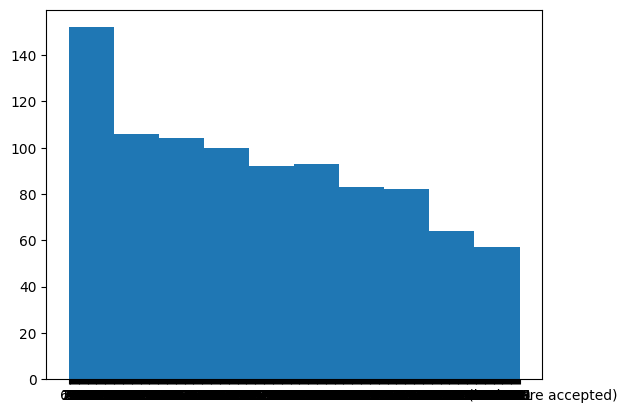

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Answer'])
plt.show()